#### You will train a Multi-Layer Perceptron neural network for the task of classification on the dataset lab04_dataset_3.csv using MLPClassifier. The inputs to your MLPClassifier are alcohol, citric_acid, free_sulfur_dioxide, residual_sugar, sulphates, while the output is quality_grp, which has two categories, namely, 0 and 1. Use a train-test split of 80-20. For the learning task, you will train neural network models with different architectures:
#### a. Activation func:on = [logistic, relu, tanh]
#### b. Hidden layers = [1, 2, 3, 4, 5]
#### c. Neurons per layer = [2, 4, 6, 8]
#### So, basically in the first iteration you will create a learning model using the neural network architecture [logistic, 1, 2], in the second iteration you will use [logistic, 1, 4], all the way to [tanh, 5, 8]. For each of these learned models, compute the Misclassification Rate on the test set. Once you are done with all the training, you should output a dataframe with columns Activation Function, Hidden layers, Neurons per layer, Misclassification Rate, where each row will correspond with the individual training models. Since the total count of activation functions, hidden layers and neurons are 3, 5, 4 respectively, the number of rows in your output dataframe should be 3 x 5 x 4 = 60. Also use max_iter=10000 and random_state=2023484 inside MLPClassifier definition

In [338]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pylab as plt

In [279]:
data = pd.read_csv('lab04_dataset_3.csv')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_grp
0,7.4,0.20,0.43,7.80,0.045,27.0,153.0,0.99640,3.19,0.55,9.0,7,white,1
1,5.9,0.32,0.19,14.50,0.042,37.0,115.0,0.99684,3.16,0.43,10.3,5,white,0
2,6.8,0.37,0.28,1.90,0.024,64.0,106.0,0.98993,3.45,0.60,12.6,8,white,1
3,7.4,0.25,0.36,2.05,0.050,31.0,100.0,0.99200,3.19,0.44,10.8,6,white,0
4,6.1,0.68,0.52,1.40,0.037,32.0,123.0,0.99022,3.24,0.45,12.0,6,white,0


In [280]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'quality_grp'],
      dtype='object')

In [281]:
X = data[['alcohol', 'citric_acid', 'free_sulfur_dioxide', 'residual_sugar', 'sulphates']] 
Y = data[['quality_grp']]

In [282]:
for i in X.columns:
    print(type(X[i]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [283]:
X.head()

,alcohol,citric_acid,free_sulfur_dioxide,residual_sugar,sulphates
0,9.0,0.43,27.0,7.80,0.55
1,10.3,0.19,37.0,14.50,0.43
2,12.6,0.28,64.0,1.90,0.60
3,10.8,0.36,31.0,2.05,0.44
4,12.0,0.52,32.0,1.40,0.45


In [284]:
Y.head()

,quality_grp
0,1
1,0
2,1
3,0
4,0


In [285]:
Y = Y.values.ravel()

In [286]:
Y

array([1, 0, 1, ..., 0, 0, 0])

In [287]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

In [288]:
activationFunction = ['logistic', 'relu', 'tanh']
hiddenLayers = [1, 2, 3, 4, 5]
neuronPerLayers = [2, 4, 6, 8]

In [289]:
def mlpClassifier(activation, layer, neuron, X_train, X_test, Y_train, Y_test):
    mlpClassifier = MLPClassifier(hidden_layer_sizes=tuple(neuron for _ in range(layer)),
                                  activation=activation, max_iter=10000, random_state=2023484)
    mlpClassifier.fit(X_train, Y_train)
    y_pred = mlpClassifier.predict(X_test)
    return y_pred

In [290]:
def builtMLPClassifier(): 
    output = []
    index = 0

    for activations in activationFunction:
        for layers in hiddenLayers:
            for neurons in neuronPerLayers:
                y_pred = mlpClassifier(activations, layers, neurons, X_train, X_test, Y_train, Y_test)
                misClassificationRate = 1 - accuracy_score(Y_test, y_pred)
                output.append([activations, layers, neurons, round(misClassificationRate, 6)])
                print(f'{activations} {layers} {neurons} {round(misClassificationRate, 6)}')
                index+=1
                
    print(f"No of iterations = {index}")
    return output 

In [291]:
output = builtMLPClassifier()

logistic 1 2 0.195385
logistic 1 4 0.212308
logistic 1 6 0.212308
logistic 1 8 0.212308
logistic 2 2 0.193077
logistic 2 4 0.212308
logistic 2 6 0.212308
logistic 2 8 0.191538
logistic 3 2 0.212308
logistic 3 4 0.212308
logistic 3 6 0.212308
logistic 3 8 0.186154
logistic 4 2 0.212308
logistic 4 4 0.212308
logistic 4 6 0.212308
logistic 4 8 0.212308
logistic 5 2 0.212308
logistic 5 4 0.212308
logistic 5 6 0.212308
logistic 5 8 0.212308
relu 1 2 0.212308
relu 1 4 0.193077
relu 1 6 0.191538
relu 1 8 0.19
relu 2 2 0.212308
relu 2 4 0.192308
relu 2 6 0.19
relu 2 8 0.191538
relu 3 2 0.212308
relu 3 4 0.186923
relu 3 6 0.186923
relu 3 8 0.19
relu 4 2 0.212308
relu 4 4 0.212308
relu 4 6 0.188462
relu 4 8 0.187692
relu 5 2 0.212308
relu 5 4 0.193077
relu 5 6 0.201538
relu 5 8 0.187692
tanh 1 2 0.187692
tanh 1 4 0.212308
tanh 1 6 0.212308
tanh 1 8 0.189231
tanh 2 2 0.212308
tanh 2 4 0.212308
tanh 2 6 0.188462
tanh 2 8 0.212308
tanh 3 2 0.212308
tanh 3 4 0.212308
tanh 3 6 0.212308
tanh 3 8 0.212

In [294]:
outputDF = pd.DataFrame(output, columns=['Activation_Function', 'Hidden_Layers', 'Neuron_per_Layers', 'MisClassificationRate'])
print(outputDF.shape)

(60, 4)


In [295]:
outputDF.head()

,Activation_Function,Hidden_Layers,Neuron_per_Layers,MisClassificationRate
0,logistic,1,2,0.195385
1,logistic,1,4,0.212308
2,logistic,1,6,0.212308
3,logistic,1,8,0.212308
4,logistic,2,2,0.193077


#### 2) Create a scatterplot of the Misclassification Rate, make sure that the misclassifiction rates are distinguishable by different colors according to their activation function. So, the scatterplot should have 3 colors differentiating the misclassification rates associated with the 3 activation functions. 

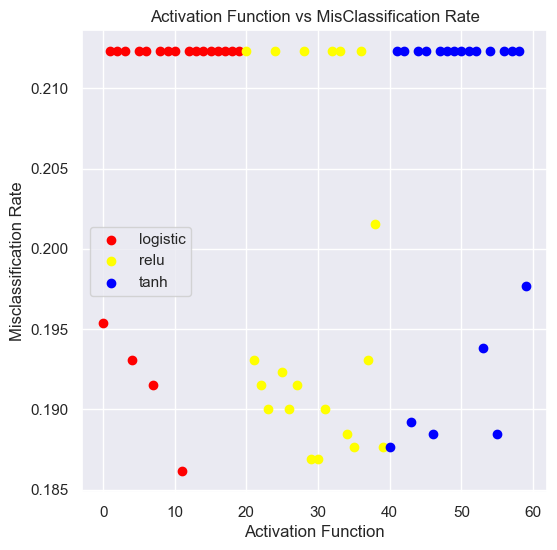

In [306]:
activationColors = {'logistic':'red' , 'relu': 'yellow', 'tanh': 'blue'}

plt.figure(figsize=(6, 6))

for items in activationFunction:
    activationData = outputDF[outputDF['Activation_Function'] == items]
    plt.scatter(activationData.index, activationData['MisClassificationRate'], color=activationColors[items], label=items)

plt.title('Activation Function vs MisClassification Rate')
plt.xlabel('Activation Function')
plt.ylabel('Misclassification Rate')
plt.grid(True)
plt.legend()

#### 3) The model with the lowest Misclassification Rate is the best neural network. Output the model parameters (activation function, hidden layers, neurons) of this neural network. In the case of ties, choose the network with fewer neurons overall.

In [309]:
sortedOutputDf = outputDF.sort_values(by='MisClassificationRate', ascending=True)
sortedOutputDf.head()

,Activation_Function,Hidden_Layers,Neuron_per_Layers,MisClassificationRate
11,logistic,3,8,0.186154
29,relu,3,4,0.186923
30,relu,3,6,0.186923
39,relu,5,8,0.187692
40,tanh,1,2,0.187692


In [314]:
bestParameters = sortedOutputDf.iloc[0]

print(f'The best model paameters :\n Activation Function : {bestParameters['Activation_Function']} \n Hidden layers : {bestParameters['Hidden_Layers']} \n Neuron per layers : {bestParameters['Neuron_per_Layers']}')

The best model paameters :
 Activation Function : logistic 
 Hidden layers : 3 
 Neuron per layers : 8


--------------------------------------------------------------------------------------------

#### 4) You will train a Multi-Layer Perceptron neural network for the task of regression on the dataset lab04_dataset_4.csv using MLPRegressor. The inputs to your MLPRegressor are housing_median_age, total_rooms, households, median_income and the output is median_house_value. First, normalize the dataset, and then create an 80-20 train-test split. In a similar manner to the previous classification task, you will once again learn multiple neural network models of varying architectures.
#### a. Activation function = [relu, tanh]
#### b. Hidden layers = [2, 3, 4]
#### c. Neurons per layer = [4, 6, 8]
#### For each of these learned models, compute the Root Mean Square Error. Once you are done with all the training, you should output a dataframe with columns Ac9va9on func9on, Hidden layers, Neurons per layer, Root Mean Square Error, where each row will correspond with the individual training models. Since the total count of activation functions, hidden layers and neurons are 2, 3, 3 respectively, the number of rows in your output dataframe should be 2 x 3 x 3 = 18. Also use random_state=2023484 inside MLPRegressor definition 

In [401]:
data = pd.read_csv('lab04_dataset_4.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [402]:
data.shape

(17000, 9)

In [403]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [404]:
X = data[['housing_median_age', 'total_rooms', 'households', 'median_income']]
Y = data[['median_house_value']]
X.head()

,housing_median_age,total_rooms,households,median_income
0,15.0,5612.0,472.0,1.4936
1,19.0,7650.0,463.0,1.8200
2,17.0,720.0,117.0,1.6509
3,14.0,1501.0,226.0,3.1917
4,20.0,1454.0,262.0,1.9250


In [405]:
# normalizing the input
scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = Y.values.ravel()


In [406]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)

In [407]:
activationFunction = ['relu', 'tanh']
hiddenLayers = [2, 3, 4]
neuronPerLayers = [4, 6, 8]

In [408]:
def mlpRegression(activation, layer, neuron):
    mlpRegressor = MLPRegressor(hidden_layer_sizes=tuple(neuron for _ in range(layer)), activation=activation, random_state=2023484)
    mlpRegressor.fit(X_train, Y_train)
    y_pred = mlpRegressor.predict(X_test)
    return y_pred

def buildMLPRegressor():
    for activation in activationFunction:
        for layers in hiddenLayers:
            for neurons in neuronPerLayers:
                y_pred = mlpRegression(activation, layers, neurons)
                rootMeanSquareError = np.sqrt(mean_squared_error(Y_test, y_pred))
                print(activation, ' ' , layers, ' ' , neurons, ' ', round(rootMeanSquareError, 6))
                output.append([activation, layers, neurons, round(rootMeanSquareError, 6)])

In [409]:
output = []
buildMLPRegressor()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


relu   2   4   134660.842427


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


relu   2   6   131744.996886


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


relu   2   8   97965.447899


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


relu   3   4   79064.939507


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


relu   3   6   78102.96205


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


relu   3   8   77861.794918


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


relu   4   4   78318.367529


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


relu   4   6   77708.195106


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


relu   4   8   77474.342715


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


tanh   2   4   240883.396086


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


tanh   2   6   240858.541153


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


tanh   2   8   240834.625235


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


tanh   3   4   240882.620289


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


tanh   3   6   240859.676896


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


tanh   3   8   240835.54572


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


tanh   4   4   240883.247914


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


tanh   4   6   240860.964321
tanh   4   8   240834.024618


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [410]:
outputDF = pd.DataFrame(output, columns=['Activation_Function', 'Hidden_Layers', 'Neurons_Per_Layers', 'Root_Mean_Square_Error'])

In [413]:
outputDF.head()

,Activation_Function,Hidden_Layers,Neurons_Per_Layers,Root_Mean_Square_Error
0,relu,2,4,134660.842427
1,relu,2,6,131744.996886
2,relu,2,8,97965.447899
3,relu,3,4,79064.939507
4,relu,3,6,78102.962050


#### 5) Create a scatterplot of the Root Mean Square Error, make sure that the root mean square errors are distinguishable by different colors according to their activation function. So, the scatterplot should have 2 colors differentiating the root mean square errors associated with the 2 activation functions.

0    134660.842427
1    131744.996886
2     97965.447899
3     79064.939507
4     78102.962050
5     77861.794918
6     78318.367529
7     77708.195106
8     77474.342715
Name: Root_Mean_Square_Error, dtype: float64
9     240883.396086
10    240858.541153
11    240834.625235
12    240882.620289
13    240859.676896
14    240835.545720
15    240883.247914
16    240860.964321
17    240834.024618
Name: Root_Mean_Square_Error, dtype: float64


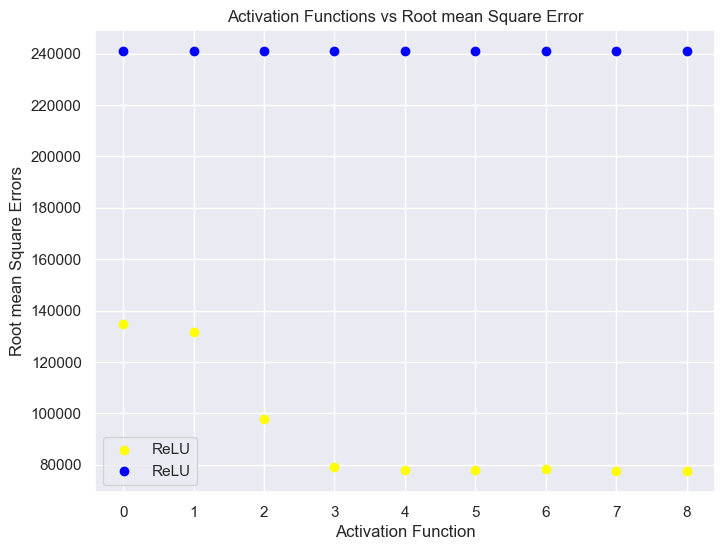

In [430]:
activationColors = {'relu': 'yellow', 'tanh': 'blue'}

plt.figure(figsize=(8, 6))
for colors in activationColors:
    result = outputDF[outputDF['Activation_Function'] == colors]['Root_Mean_Square_Error']
    print(result)
    plt.scatter(range(len(result)), result, color=activationColors[colors], label ='ReLU')

plt.title("Activation Functions vs Root mean Square Error")
plt.xlabel('Activation Function')
plt.ylabel('Root mean Square Errors')
plt.legend()
plt.grid(True)

#### 6) The model with the lowest Root Mean Square Error is the best neural network. Output the model parameters (activation function, hidden layers, neurons) of this neural network. In the case of ties, choose the network with fewer neurons overall. 

In [436]:
sortedOutputDf = outputDF.sort_values(by='Root_Mean_Square_Error', ascending=True)
bestModel = sortedOutputDf.iloc[0]


print("The bes Model is")
print(f"Activation Function : {bestModel['Activation_Function']}")
print(f"Hidden Layers : {bestModel['Hidden_Layers']}")
print(f"Neurons per layer : {bestModel['Neurons_Per_Layers']}")
print(f"Root Mean Square Error : {bestModel['Root_Mean_Square_Error']}")

The bes Model is
Activation Function : relu
Hidden Layers : 4
Neurons per layer : 8
Root Mean Square Error : 77474.342715
